# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Vaidehi Sonar </font>

# I. Introduction

The aim of this assignment is to perform classification of data by implementing different classification models, comparing them and understanding how each model works with the dataset. The dataset used is of a third-party travel insurance servicing company that is based in Singapore and  has been taken from Kaggle. The classification of data will be performed by using Pocket algorithm, QDA, LDA and Logistic Regression. Several evealuation metrics will be used to compare and evaluate these models andthe best performing model will be found out.

In [1]:
import pdb
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# II. Data

It is a dataset of a third-party travel insurance servicing company that is based in Singapore. The dataset has been taken from kaggle Following are the arrtributes:<br/>
**Target**: Claim Status (Claim.Status)<br/>
Name of agency(Agency)<br/>
Type of travel insurance agencies (Agency.Type)<br/>
Distribution channel of travel insurance agencies (Distribution.Channel)<br/>
Name of the travel insurance products (Product.Name)<br/>
Duration of travel (Duration)<br/>
Destination of travel (Destination)<br/>
Amount of sales of travel insurance policies (Net.Sales)<br/>
Commission received for travel insurance agency (Commission)<br/>
Gender of insured (Gender)<br/>
Age of insured (Age)<br/>

### PRE-PROCESSING

Data Pre-processing required. Categorical values are changed to numerical values using label_encoder() and get dummies() from pandas. Gender column has been dropped due to large number of null values(71% of null values).

In [5]:
le = preprocessing.LabelEncoder()
cls_df = pd.read_csv('travel insurance.csv')
cls_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [6]:
cls_df.info()
cls_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [7]:
cls = cls_df.apply(le.fit_transform)
cls.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,0,12,0,188,79,105,396,80
1,3,1,0,12,0,188,79,105,396,70
2,6,1,1,16,0,67,4,80,716,31
3,6,1,1,16,0,62,4,91,646,31
4,6,1,1,16,0,81,61,120,442,40


In [8]:
corr_mat=cls.corr()
corr_mat

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
Agency,1.000000,0.207529,-0.191928,0.138890,-0.121685,-0.132776,-0.208348,-0.203385,-0.229593,0.136656
Agency Type,0.207529,1.000000,-0.076895,-0.272308,-0.098706,-0.124697,-0.150909,-0.090091,-0.422238,-0.209233
Distribution Channel,-0.191928,-0.076895,1.000000,-0.155318,-0.000798,-0.058109,-0.052289,-0.014495,-0.054692,-0.164432
Product Name,0.138890,-0.272308,-0.155318,1.000000,0.000679,-0.088026,-0.069257,-0.097530,0.521728,0.249311
Claim,-0.121685,-0.098706,-0.000798,0.000679,1.000000,0.099759,0.047105,0.107731,0.100080,-0.012387
Duration,-0.132776,-0.124697,-0.058109,-0.088026,0.099759,1.000000,0.088793,0.381276,0.307109,0.004256
Destination,-0.208348,-0.150909,-0.052289,-0.069257,0.047105,0.088793,1.000000,0.006268,-0.031414,-0.028951
Net Sales,-0.203385,-0.090091,-0.014495,-0.097530,0.107731,0.381276,0.006268,1.000000,0.359348,0.035174
Commision (in value),-0.229593,-0.422238,-0.054692,0.521728,0.100080,0.307109,-0.031414,0.359348,1.000000,0.204648
Age,0.136656,-0.209233,-0.164432,0.249311,-0.012387,0.004256,-0.028951,0.035174,0.204648,1.000000


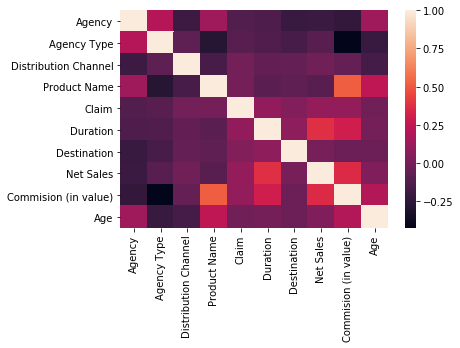

In [9]:
heat_map=sns.heatmap(corr_mat)

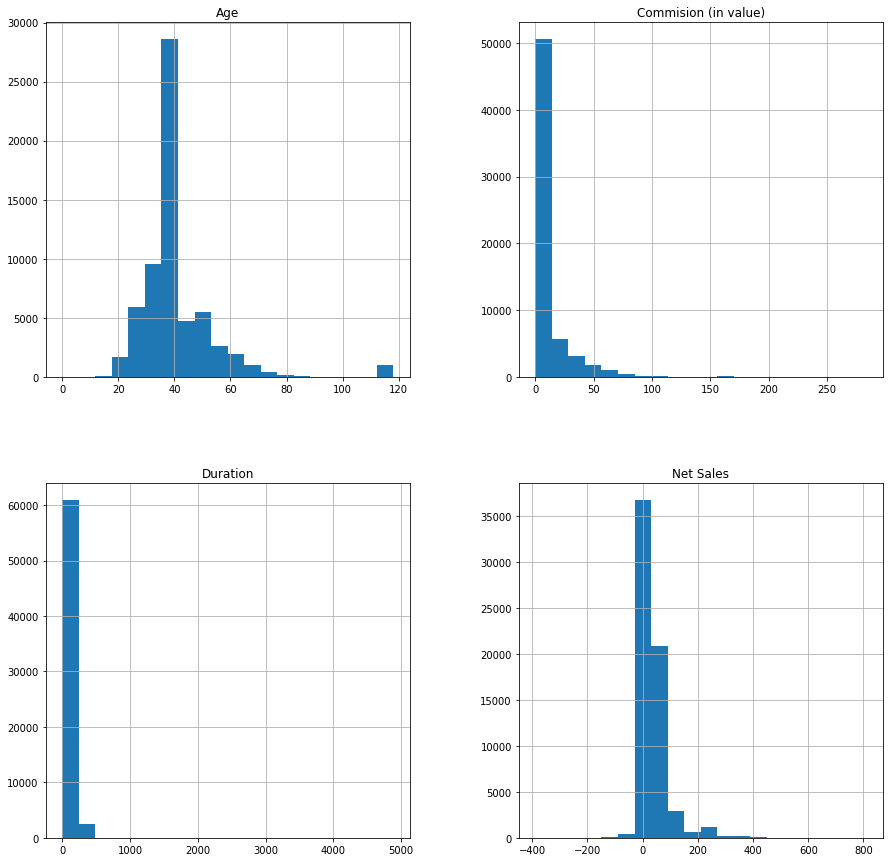

In [10]:
cls_df.hist(bins=20,figsize=(15,15)) 
plt.show()

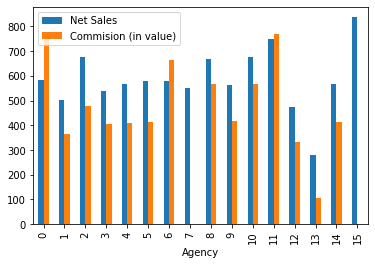

In [11]:
cls_df1=cls.groupby(['Agency']).mean()
bar_plot = cls_df1.plot.bar(y=['Net Sales','Commision (in value)'])

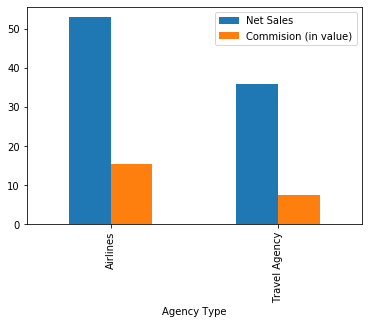

In [12]:
cls_df2=cls_df.groupby(['Agency Type']).mean()
bar_plot = cls_df2.plot.bar(y=['Net Sales','Commision (in value)'])

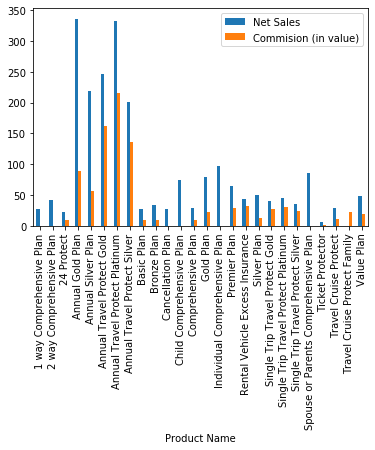

In [13]:
cls_df3=cls_df.groupby(['Product Name']).mean()
bar_plot1 = cls_df3.plot.bar(y=['Net Sales','Commision (in value)'])

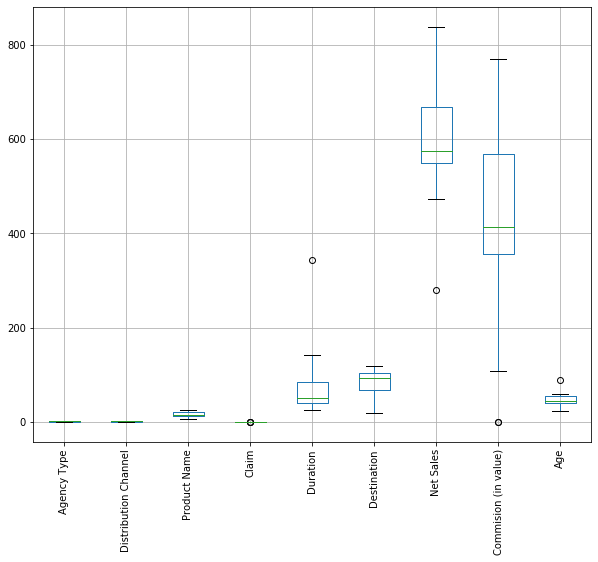

In [14]:
cls_df1.boxplot(rot=90,figsize=(10,8))

### PRELIMINARY OBSERVATIONS

#### Heat Maps and Correlation Matrix:

- There is quite some relevance in product name and commission.
- There is some correlation between duration,age and commission.
- There is some correlation between duration,age and Net Sales.
- Net sales and commission is correlated to some extent.
- Net sales,commission is related to Claim status minorly.
- It can be observed that some attributes such as duration, destination, etc. does not have any impact on claim status.

#### Histograms:

- Data samples mostly belong to the class of people who did not claim the insurance.

#### Bar Plots:

- Net sales as well as commission is higher for airline insurance agencies than travel insurance agencies.
- Agency number 7,15 have no commission.
- Net sales are highest for agency 15 where commission is highest for agency 0(which actually exceeds its net sales).
- The net sales and commission for some products namely Annual Gold Plan and Annual Travel Protect Platinum are significantly high compared to others.

#### Box Plots:

- The quartile range for commission is approx 300-700 and for net sales is approx 500-900.

# III. Method

### Pocket

Pocket is a variation of perceptron algorithm. It overcomes the unstability problem of perceptron algorithm by storing the best solution so far in its pocket. Wp stores the best solution. The best result means the number of misclassification is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket with the new weights or if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution. Whenever the data is non-linear there is no guarantee of convergence.

$$\displaystyle
w^{(k+1)}=w^{(k)}+α(t_i)(x_i)$$
where α is learning rate

The model is implemented using a Pocket class which inherits the base class. It overrides the methods train and use. Best solution is stored by comparing previous and new weights in compare function. 

### QDA

Quadratic discriminant analysis (QDA) is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements from each class are normally distributed. However, in QDA there is no assumption that the covariance of each of the class is identical.
The decision boundary is placed where the discriminant functions meet such as δ1==δ2.<br>

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

For a new sample x, we can predict the label with

$$\displaystyle
y=argmax_kδ_k(x). $$

As the $\displaystyleδ_k$function is quadratic in x, the decision boundary is quadratic. Thus, we call this approach as Quadratic Discriminant Analysis (QDA).


### LDA

The difference between LDA and QDA is that LDA assumes that each class has same covariance while QDA has different covariance for different classes.This is because maintainingthe covariance matrix is expensive. It also makes some assumptions about the data i.e. each Attribute has same variance and that the data is Gaussian.<br>
LDA makes predictions by calculating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class.
$$
 \delta_k(x) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
 $$
In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
 $$ 

### Logistic Regression

If we try fitting Least Squares on the discrete target for classification, with it can cause masking problem i.e. one class estimation is masked by other predictions. So, we consider a linear regression model that directly predicts P(T=k∣x) and not the class label k. This approach is called as Logistic Regression. Logistic Regression is used when the target variable is categorical. The model uses probability to calculate what instance belongs to what class. After calculating probability of an instance belong to a particular class, if probability is greater than 0.5 then then the instance belong to that class else it belongs to the other class.
Using the gradient, we can update the weights,
$$
 w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
 $$
Converting the summation into matrix calculation,

$$
 w_j \leftarrow w_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big).
 $$

## Explanation Of Code

The Super Class i.e the base model class that consists of two abstract methods train() and use() which have to be implemented by any class that inherits this class. Classifier class extends BaseModel class with functions that are again abstract. Classifier class also provides three methods normalize(), check_matrix() and add_ones(). check_matrix() checks if passed argument is 2D matrix or not, if it is not, then it raises the value error. add_ones() checks whether the matrix is 2D or not and if it is, it adds a column of 1s at the Oth position of the matrix. normalize() function standardizes the input by calculating mean and standard deviation.

### A. Super Classs Definition

In [15]:
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
        print(X)
        if self.meanX is None:
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [16]:
class Pocket(Classifier):
    
    #pdb.set_trace()
    def __init__(self):
        self.maxiter = 5
        self.alpha = 0.01
        self.w = None
        self.wp = None
        
    @staticmethod 
    def compare(X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
        N = X.shape[0]
        #print (N)
        #print (self.w)
        self.w = np.zeros(X.shape[1])
        self.wp = copy(self.w)
        for i in range(self.maxiter):
            converged = True
            for k in np.random.permutation(N): #range(N):
                #print(self.w)
                #print(X.shape)
                y = self.w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
            ##### additional for pocket algorithm 
                    if self.compare(X, T, self.w, self.wp) > 0: 
                        self.wp[:] = self.w[:]
                        print("wp is:",self.wp)
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)
        #plt.plot(X@self.wp)
        print("wp is",self.wp)
    def use(self,X):
        return np.sign(X @ self.wp)     

### Pocket Code Explanation

Pocket Class is a child class of the Super Class that implements all the abstract methods of the Super Class. It has three functions train(), use() and compare(). train() will be used for training the model. Also, maxiter means maximum number of iterations i.e maximum number of times the training of model will occur. use() will use the test data to predict the values.compare()  is used to compare weights. Initially, w is set to zero. Then the weight is copied to wp nothing but the pocket that stores the best weight seen so far. This value will be replaced if weights with better value are seen and then kept in the wp.

### C. QDA

In [17]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.prior1=None
        self.mu2=None
        self.prior2=None
    
    def QDA1(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)

    def train(self,Xtr1,Ttr1):
        T=Ttr1
        Xx=self.normalize(Xtr1)
        df = pd.DataFrame(Xx, index=Xtr1.index,columns = Xtr1.columns)
        df['claim']= T
        #pdb.set_trace()
        X1 = df[df.claim == 0]
        X1=X1.drop(['claim'],axis=1)
        X2=df[df.claim == 1]
        X2=X2.drop(['claim'],axis=1)
        #print (X2)
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))

        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)

        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.prior1 = N1 / N1+N2
        self.prior2 = N2 / N1+N2
        
    def use(self,X):
        #pdb.set_trace()
        Xt = self.normalize(X)
        self.d1 = self.QDA1(Xt,self.mu1,self.Sigma1,self.prior1)
        self.d2 = self.QDA1(Xt,self.mu2,self.Sigma2,self.prior2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df1 = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(self.d1>self.d2,0,1)
        return pred,self.d1,self.d2

### QDA Code Explanation

QDA id a child class of Super Class Classifier that implements its abstract methods. Function QDA1() calculates the discriminant value for each class. train() takes Xtr1,Ttr1 as input where Xtr1 is train data and Ttr1 is target variables of train data. mu1 and mu2 are mean. N1 and N2 are used to store the number of claim rows in it using which we can calculate the probability based upon number of rows of a particular class. Now probability is calculated by N1/N1+N2 where N1 is number of rows of class = 1 and N1+N2 is total number of rows for both class. Similarly, we will calculate probability for both the classes. We store these probabilities in variables prior1 and prior2.Sigma1 and Sigma2 stores the covariance for X1(class 1) and X2(class 2).
use() will evaluate d1 and d2 by calling QDA1() and then checking the greater value and assigning the class 0 and 1 accordingly and returns prediction and d1,d2.

### D. LDA

In [18]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma3=None        
        self.d1=None
        self.d2=None
        self.prior1=None
        self.mu2=None
        self.prior2=None

    def LDA1(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
                    - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                    + np.log(prior)
    
    def train(self,Xtr1,Ttr1):
        #pdb.set_trace()
        # LDA train
        ## compute the mean and covariance
        T=Ttr1
        Xx=self.normalize(Xtr1)
        df = pd.DataFrame(Xx, index=Xtr1.index,columns = Xtr1.columns)
        df['claim']=T
        X3 = df[df.claim == 0]
        X3=X3.drop(['claim'],axis=1)
        X4=df[df.claim == 1]
        X4=X4.drop(['claim'],axis=1)

        self.mu11 = np.array(np.mean(X3, 0))
        self.mu22 = np.array(np.mean(X4, 0))

        self.Sigma3 = np.cov(Xx.T)
        
        N11= X3.shape[0]
        N22= X4.shape[0]

        self.prior11 = N11 / N11+N22
        self.prior22 = N22 / N11+N22
        

    def use(self,X):
        #pdb.set_trace()
        Xtest1 = self.normalize(X)
        self.d3 = self.LDA1(Xtest1,self.mu11,self.Sigma3,self.prior11)
        self.d4 = self.LDA1(Xtest1,self.mu22,self.Sigma3,self.prior22)
        self.d3 = np.array(self.d3).flatten()
        self.d4 = np.array(self.d4).flatten()
        dfn = pd.DataFrame({'d3':self.d3, 'd4':self.d4})
        pred1=np.where(self.d3>self.d4,0,1)
        return pred1,self.d3,self.d4
    

### LDA Code Explanation

LDA Class above is child class of Super class Classifier. It implements its abstract methods. LDA1() is used to calculate the discriminant value. train() takes Xtr1,Ttr1 as input where Xtr1 is train data and Ttr1 is target variables of train data.
mu1 and mu2 are mean.N1 and N2 are used to store the number of claim rows in it so that we can calculate probability based upon number of rows of a particular class. Probability is calculated by N1/N1+N2 where N1 is number of rows of class=1 and N1+N2 is total number of rows for both class. Similarly, we will calculate probability for both the classes.
These probabilities are stored in variables prior1 and prior2.
use() will evaluate d1 and d2 by calling LDA1() and then by checking the greater value and class 0 and 1 will be assigned accordingly and prediction, d1,d2 is returned.

### E. Logistic Regression

In [19]:
class LogisticReg(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.w= None
        self.alpha = 0.01
        self.niter = 10
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    #@staticmethod
    # for linear fx
    def g(self,X, w):
        return self.softmax(X @ w) 
    
    def train(self,X,T):
        #pdb.set_trace()
        X = self.normalize(X)
        D = X.shape[1]
        K = len(np.unique(T))
        N = X.shape[0]
        
        self.w = np.random.rand(D+1, K)
        
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        print(T)
    
        (T[:,0])[T[:,1]==1]=0
 
       
        print(T)
        
        for step in range(self.niter):
            ys = self.g(X, self.w)
            self.w += self.alpha * X.T @ (T - ys)
            #print("w is",self.w)
        
    def use(self,X):
        Xl = self.normalize(X)
        Xl = self.add_ones(Xl)
        return self.g(Xl, self.w)

### Logistic Regression Code Explanation

Logistic regression class is child class of Super class Classifier. Hence, it will implement the abstract methods of this class. train() function will takes input matrices X and T. It calculates values of D and K. D is number of features, K is number of unique classes in T. The weights are updated in the train() function. use() function takes test data X as input.It normalizes it and add ones column to X. It calculates output variable using softmax() function on dot product of Xl and weight matrix. 

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

The data is splitted into training and testing sets. Training dataset is 80% while testing is 20%. 

In [21]:
new1 = cls_df.drop(columns=['Agency','Agency Type','Destination','Duration','Distribution Channel','Product Name'])
dfnew1 = pd.DataFrame(new1, index=new1.index,columns = new1.columns)
encod1 = dfnew1.apply(le.fit_transform)
Xn1 = encod1[encod1.Claim == 1]
Xn2 = encod1[encod1.Claim == 0]
Xn2 = Xn2.sample(n=4000,random_state=100)
Xnc1 = pd.concat([Xn1,Xn2]) 
ntar2 = Xnc1[["Claim"]]
Xnc1= Xnc1.drop(columns=['Claim'])
Xtr, Xtst, Ttr, Ttst = train_test_split(Xnc1, ntar2, test_size=0.20, random_state=42)

In [22]:
for column in Xtr.columns:
    Xtr[column]=(Xtr[column]-Xtr[column].mean())/Xtr[column].std()
for column in Xtst.columns:
    Xtst[column]=(Xtst[column]-Xtst[column].mean())/Xtst[column].std()
for column in Ttr.columns:
    Ttr[column]=(Ttr[column]-Ttr[column].mean())/Ttr[column].std()
for column in Ttst.columns:
    Ttst[column]=(Ttst[column]-Ttst[column].mean())/Ttst[column].std()
    
Xtrain = Xtr.as_matrix()
Xtest = Xtst.as_matrix()
Ttrain = Ttr.as_matrix()
Ttest = Ttst.as_matrix()    
Ttrain = np.sign(Ttrain)
Ttest = np.sign(Ttest)

F:\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\Ana\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
F:\Ana\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

In [131]:
poc = Pocket()
poc.train(Xtrain,Ttrain)

#PREDICT ON TRAINING DATASET
T_pred_tr=poc.use(Xtrain)

#PREDICT ON TESTING DATASET
T_pred_t=poc.use(Xtest)

wp is: [-0.00652163 -0.0157426  -0.00076014]
wp is: [-0.0098739  -0.00721235  0.00193101]
wp is: [-0.01114626  0.00131789  0.00462217]
wp is: [-0.00692175  0.00984814  0.00731333]
wp is: [-0.00157738  0.00775764 -0.00877231]
wp is: [0.00626219 0.00966223 0.00340992]
wp is: [ 0.00016711  0.00534194 -0.01095007]
wp is: [ 0.00330945  0.01930448 -0.01444275]
wp is: [ 0.01147989  0.02660806 -0.00620529]
wp is: [-0.00412783  0.00150787  0.04147539]
wp is: [ 0.00187612 -0.00236554  0.01800593]
wp is: [ 0.00014784 -0.0001936   0.02567787]
wp is: [ 0.00031258 -0.00475423  0.0166159 ]
wp is: [-0.00020255 -0.00123548  0.00475857]
wp is: [-0.00051229 -0.00247777  0.01432781]
wp is: [ 0.0001547  -0.00318987  0.01670632]
wp is: [ 2.21156216e-05 -2.49964030e-03  8.53936639e-03]
End of training:  4
wp is [ 2.21156216e-05 -2.49964030e-03  8.53936639e-03]


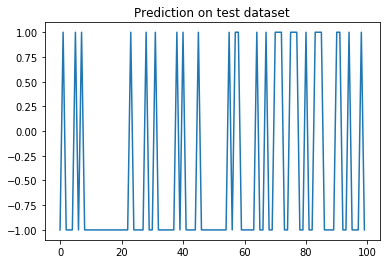

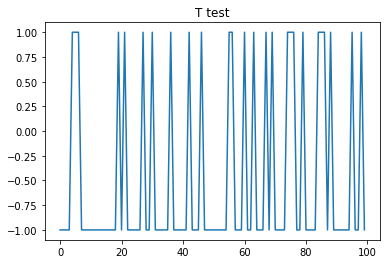

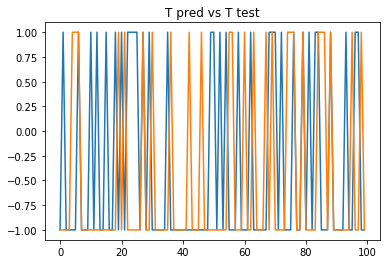

In [132]:
plt.title("Prediction on test dataset")
plt.plot(T_pred_tr[0:100])
plt.show()
plt.title("T test")
plt.plot(Ttest[0:100])
plt.show()
plt.title("T pred vs T test")
plt.plot(T_pred_t[0:100])
plt.plot(Ttest[0:100])
plt.show()


### Accuracy and F1 for training data

In [133]:
print('Accuracy:', accuracy_score(Ttrain,T_pred_tr))
print('F1 score:', f1_score(Ttrain,T_pred_tr))

Accuracy: 0.6305506216696269
F1 score: 0.1991199119911991


### Confusion Matrix on Testing Dataset

In [134]:
cf=confusion_matrix(Ttest,T_pred_t)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]

In [135]:
cf

array([[567, 221],
       [137,  61]], dtype=int64)

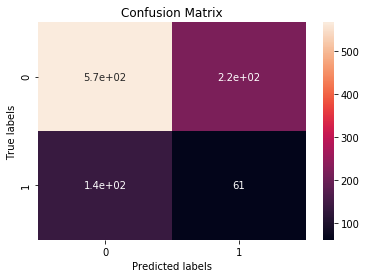

In [136]:
ax = plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); 

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### Evaluation Metrics

#### Precision

In [137]:
precision=(TP/(TP+FP))
precision

0.21631205673758866

#### Specificity

In [138]:
specificity=TN/(TN+FP)
specificity

0.7195431472081218

#### Recall

In [139]:
recall=TP/(TP+FN)
recall

0.30808080808080807

### Accuracy and F1 on testing dataset

In [140]:
print('Accuracy:', accuracy_score(Ttest,T_pred_t))
print('F1 score:', f1_score(Ttest,T_pred_t))

Accuracy: 0.6369168356997972
F1 score: 0.25416666666666665


### ROC AUC Score

In [141]:
roc_auc_score(Ttest,T_pred_t)

0.513811977644465

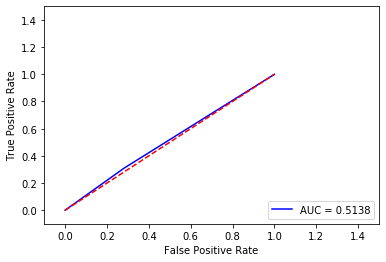

In [142]:
fp_rate, tp_rate, thr = roc_curve(Ttest, T_pred_t)
roc_auc = auc(fp_rate, tp_rate)
plt.plot(fp_rate, tp_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
new2 = cls_df.drop(columns=['Agency','Agency Type','Destination','Duration','Distribution Channel','Product Name'])
dfnew2 = pd.DataFrame(new2, index=new2.index,columns = new2.columns)
encod2 = dfnew2.apply(le.fit_transform)
#print(encod)
#print(Tnew)
        #pdb.set_trace()
Xnew1 = encod2[encod2.Claim == 1]
#print(X1)
#X1 = X1.drop(['claim'],axis=1)
Xnew2 = encod2[encod2.Claim == 0]
#print(X2)
Xnew2 = Xnew2.sample(n=4000,random_state=100)
#print(X2)
#X2 = X2.drop(['claim'],axis=1)
Xnewc = pd.concat([Xnew1,Xnew2]) 
#print(Xc)
newtar2 = Xnewc[["Claim"]]
Xnewc= Xnewc.drop(columns=['Claim'])
#print(Xc)
Xtr1, Xtst1, Ttr1, Ttst1 = train_test_split(Xnewc, newtar2, test_size=0.20, random_state=42)

In [84]:
Xtrain1 = Xtr1.as_matrix()
Xtest1 = Xtst1.as_matrix()
Ttrain1 = Ttr1.as_matrix()
Ttest1 = Ttst1.as_matrix()   
Ttr1 = np.sign(Ttr1)
Ttst1 = np.sign(Ttst1)

F:\Ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
F:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
F:\Ana\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Ana\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [85]:
qda=QDA()
qda.train(Xtr1,Ttr1)
tpred_qda_train,d1,d2=qda.use(Xtr1)
tpred_qda_test,d1,d2=qda.use(Xtst1)
tpred_qda_train

[[428   0  35]
 [716 592  55]
 [954 960  23]
 ...
 [393   0  35]
 [501   0  33]
 [608 374  29]]
[[428   0  35]
 [716 592  55]
 [954 960  23]
 ...
 [393   0  35]
 [501   0  33]
 [608 374  29]]
[[379   0  35]
 [379   0  64]
 [802   0  35]
 ...
 [762 542  32]
 [379   0  35]
 [379   0  35]]


array([0, 1, 1, ..., 0, 0, 1])

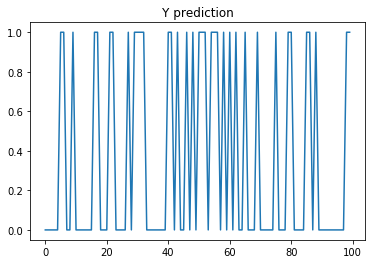

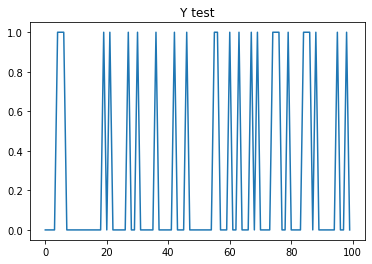

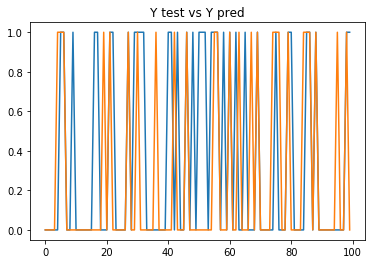

In [86]:
plt.title("Y prediction")
plt.plot(tpred_qda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(Ttst1[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(tpred_qda_test[0:100])
plt.plot(np.array(Ttst1[0:100]))
plt.show()

### Accuracy and F1 for training data

In [87]:
print('Accuracy:', accuracy_score(Ttr1,tpred_qda_train))
print('F1 score:', f1_score(Ttr1,tpred_qda_train))


Accuracy: 0.7645267698553666
F1 score: 0.46971428571428575


### Confusion Matrix on Testing Dataset

In [88]:
cf1=confusion_matrix(Ttst1,tpred_qda_test)
TP1=cf1[1][1]
TN1=cf1[0][0]
FN1=cf1[1][0]
FP1=cf1[0][1]
cf1

array([[628, 160],
       [ 74, 124]], dtype=int64)

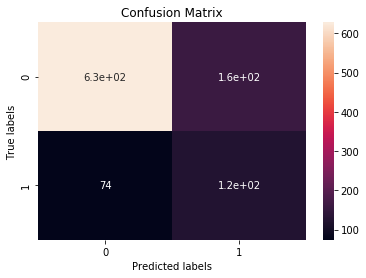

In [89]:
ax1 = plt.subplot()
sns.heatmap(cf1, annot=True, ax = ax1); 

ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix');

### Evaluation Metrics

#### Precision

In [90]:
precision1=(TP1/(TP1+FP1))
precision1

0.43661971830985913

#### Specificity

In [91]:
specificity=TN1/(TN1+FP1)
specificity

0.7969543147208121

#### Recall

In [92]:
recall1=TP1/(TP1+FN1)
recall1

0.6262626262626263

### Accuracy and F1 on testing dataset

In [93]:
print('Accuracy:', accuracy_score(Ttst1,tpred_qda_test))
print('F1 score:', f1_score(Ttst1,tpred_qda_test))

Accuracy: 0.7626774847870182
F1 score: 0.5145228215767635


### ROC AUC Score

In [94]:
roc_auc_score(Ttst1,tpred_qda_test)

0.7116084704917194

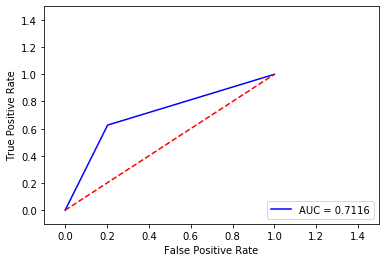

In [95]:
fp_rate1, tp_rate1, thr1 = roc_curve(Ttst1, tpred_qda_test)
roc_auc1 = auc(fp_rate1, tp_rate1)
plt.plot(fp_rate1, tp_rate1, 'b',
label='AUC = %0.4f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


[[ 379    0   35]
 [ 379    0   64]
 [ 802    0   35]
 ...
 [ 515    0   35]
 [ 534    0   35]
 [1045  886   48]]


Text(0.5, 0.92, 'QDA Discriminant Functions')

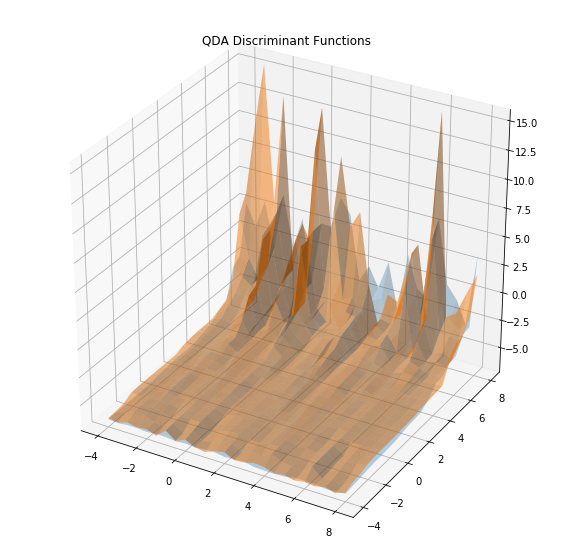

In [99]:
p,d1_p,d2_p = qda.use(Xtst1[:500])    
xp, yp = np.meshgrid(np.linspace(-4,8,25), np.linspace(-4,8,20))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xp, yp, np.sort(-1 *d1_p.reshape(xp.shape),0), alpha=0.3)
ax.plot_surface(xp, yp, np.sort(-1 *d2_p.reshape(xp.shape),0), alpha=0.5)
plt.title("QDA Discriminant Functions")

Text(0.5, 0.92, 'QDA Discriminant Functions')

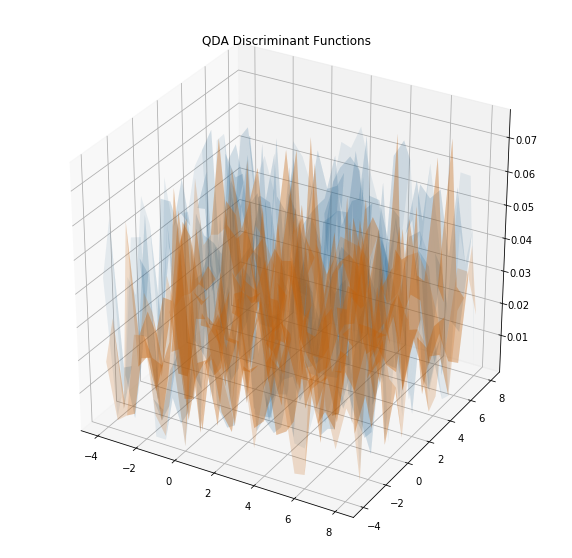

In [100]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p.reshape(xp.shape) - 0.5*Xtr1.shape[1]*np.log(2*np.pi) - np.log(qda.prior1))
prob2 = np.exp( d2_p.reshape(xp.shape) - 0.5*Xtr1.shape[1]*np.log(2*np.pi) - np.log(qda.prior2))
ax.plot_surface(xp, yp, prob1, alpha=0.09)
ax.plot_surface(xp, yp, prob2, alpha=0.2)
plt.title("QDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

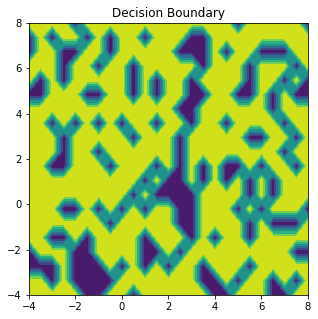

In [101]:
plt.figure(figsize=(5,5))
plt.contourf(xp, yp, (((d1_p-d2_p)) > 0).reshape(xp.shape))
plt.title("Decision Boundary")

In [102]:
lda = LDA()
lda.train(Xtr1,Ttr1)
tpred_lda_train,d3,d4=lda.use(Xtr1)
tpred_lda_test,d3,d4=lda.use(Xtst1)
tpred_lda_train

[[428   0  35]
 [716 592  55]
 [954 960  23]
 ...
 [393   0  35]
 [501   0  33]
 [608 374  29]]
[[428   0  35]
 [716 592  55]
 [954 960  23]
 ...
 [393   0  35]
 [501   0  33]
 [608 374  29]]
[[379   0  35]
 [379   0  64]
 [802   0  35]
 ...
 [762 542  32]
 [379   0  35]
 [379   0  35]]


array([0, 1, 1, ..., 0, 0, 1])

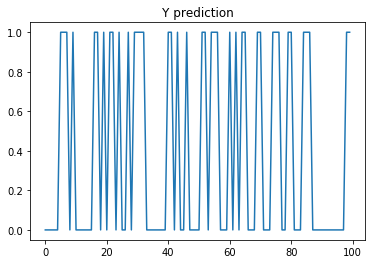

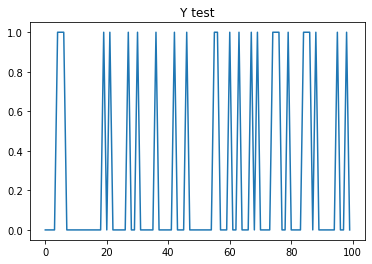

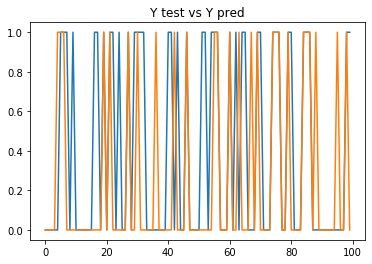

In [103]:
plt.title("Y prediction")
plt.plot(tpred_lda_test[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(Ttst1[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(tpred_lda_test[0:100])
plt.plot(np.array(Ttst1[0:100]))
plt.show()

### Accuracy and F1 for training data

In [104]:
print('Accuracy:', accuracy_score(Ttr1,tpred_lda_train))
print('F1 score:', f1_score(Ttr1,tpred_lda_train))

Accuracy: 0.7416899264146156
F1 score: 0.4532760472610097


### Confusion Matrix on Testing Dataset

In [105]:
cf2=confusion_matrix(Ttst1,tpred_lda_test)
TP2=cf2[1][1]
TN2=cf2[0][0]
FN2=cf2[1][0]
FP2=cf2[0][1]
cf2

array([[615, 173],
       [ 72, 126]], dtype=int64)

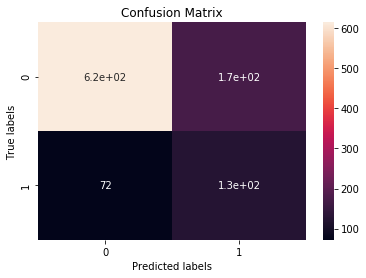

In [106]:
ax2 = plt.subplot()
sns.heatmap(cf2, annot=True, ax = ax2); 

ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix');

### Evaluation Metrics

#### Precision

In [107]:
precision2=(TP2/(TP2+FP2))
precision2

0.4214046822742475

#### Specificity

In [108]:
specificity2=TN2/(TN2+FP2)
specificity2

0.7804568527918782

#### Recall

In [109]:
recall2=TP2/(TP2+FN2)
recall2

0.6363636363636364

### Accuracy and F1 on testing dataset

In [110]:
print('Accuracy:', accuracy_score(Ttst1,tpred_lda_test))
print('F1 score:', f1_score(Ttst1,tpred_lda_test))

Accuracy: 0.7515212981744422
F1 score: 0.5070422535211266


### ROC AUC Score

In [111]:
roc_auc_score(Ttst1,tpred_lda_test)

0.7084102445777573

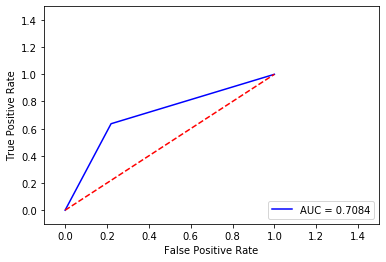

In [112]:
fp_rate2, tp_rate2, thr2 = roc_curve(Ttst1, tpred_lda_test)
roc_auc2 = auc(fp_rate2, tp_rate2)
plt.plot(fp_rate2, tp_rate2, 'b',
label='AUC = %0.4f'% roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[379   0  35]
 [379   0  64]
 [802   0  35]
 ...
 [581 454  88]
 [600   0  35]
 [880   0  27]]


Text(0.5, 0.92, 'LDA Discriminant Functions')

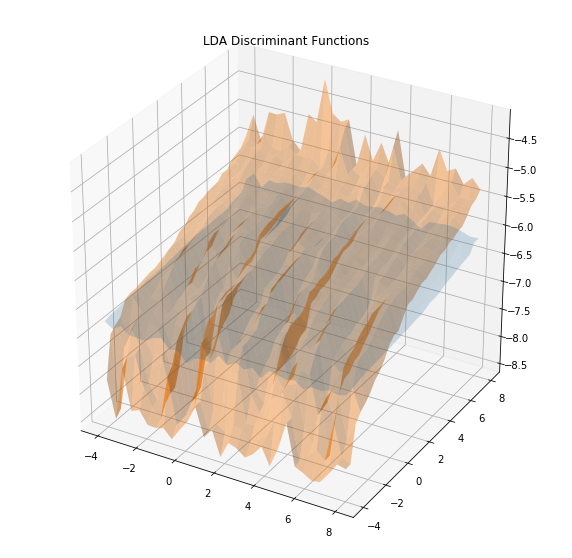

In [113]:
p1,d1_p1,d2_p1 = lda.use(Xtst1[:900]) #predicted
xp1, yp1 = np.meshgrid(np.linspace(-4,8, 30), np.linspace(-4,8, 30))
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xp1, yp1, np.sort(-1 *d1_p1.reshape(xp1.shape),0), alpha=0.2)
ax.plot_surface(xp1, yp1, np.sort(-1 *d2_p1.reshape(xp1.shape),0), alpha=0.4)
plt.title("LDA Discriminant Functions")

Text(0.5, 0.92, 'LDA Discriminant Functions')

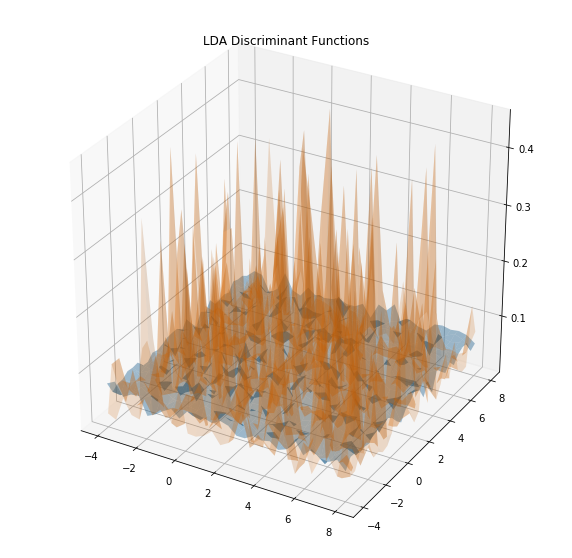

In [114]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1_p1.reshape(xp1.shape) - 0.5*Xtr1.shape[1]*np.log(2*np.pi) - np.log(lda.prior11))
prob2 = np.exp( d2_p1.reshape(xp1.shape) - 0.5*Xtr1.shape[1]*np.log(2*np.pi) - np.log(lda.prior22))
ax.plot_surface(xp1, yp1, prob1, alpha=0.4)
ax.plot_surface(xp1, yp1, prob2, alpha=0.2)
plt.title("LDA Discriminant Functions")

Text(0.5, 1.0, 'Decision Boundary')

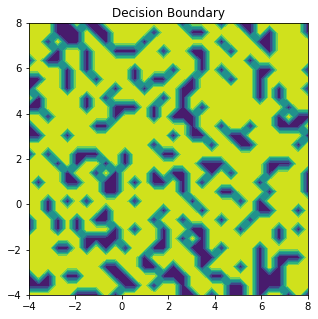

In [115]:
plt.figure(figsize=(5,5))
plt.contourf(xp1, yp1, (((d1_p1-d2_p1)) > 0).reshape(xp1.shape))
plt.title("Decision Boundary")

In [116]:
cls_dfn = cls_df.drop(columns=['Agency','Agency Type','Destination','Duration','Distribution Channel','Product Name'])
dfnew = pd.DataFrame(cls_dfn, index=cls_dfn.index,columns = cls_dfn.columns)
encod = dfnew.apply(le.fit_transform)
#print(encod)
#print(Tnew)
        #pdb.set_trace()
X1 = encod[encod.Claim == 1]
#print(X1)
#X1 = X1.drop(['claim'],axis=1)
X2 = encod[encod.Claim == 0]
#print(X2)
X2 = X2.sample(n=4000,random_state=100)
#print(X2)
#X2 = X2.drop(['claim'],axis=1)
Xc = pd.concat([X1,X2]) 
#print(Xc)
tar2 = Xc[["Claim"]]
Xc= Xc.drop(columns=['Claim'])
#print(Xc)
Xtr2, Xtst2, Ttr2, Ttst2 = train_test_split(Xc, tar2, test_size=0.20, random_state=42)

In [117]:
Xtrain2 = Xtr2.as_matrix()
Xtest2 = Xtst2.as_matrix()
Ttrain2 = Ttr2.as_matrix()
Ttest2 = Ttst2.as_matrix()  

lr = LogisticReg()
lr.train(Xtrain2[:],np.array(Ttrain2[:]))
tpred_lr_train = lr.use(Xtrain2[:])
print("this",tpred_lr_train)
tpred_lr_train1 = np.argmax(tpred_lr_train,1)
#print("this converted",tpred_lr_train1)

tpred_lr_test = lr.use(Xtest2[:])
tpred_lr_test1 = np.argmax(tpred_lr_test,1)
#print(tpred_lr_test1)


[[428   0  35]
 [716 592  55]
 [954 960  23]
 ...
 [393   0  35]
 [501   0  33]
 [608 374  29]]
[[1. 0.]
 [1. 0.]
 [1. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 1.]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[428   0  35]
 [716 592  55]
 [954 960  23]
 ...
 [393   0  35]
 [501   0  33]
 [608 374  29]]
this [[9.99992011e-01 7.98893715e-06]
 [9.99542971e-01 4.57028984e-04]
 [1.88171331e-04 9.99811829e-01]
 ...
 [9.99997746e-01 2.25408676e-06]
 [9.99811324e-01 1.88676486e-04]
 [9.87596618e-01 1.24033819e-02]]
[[379   0  35]
 [379   0  64]
 [802   0  35]
 ...
 [762 542  32]
 [379   0  35]
 [379   0  35]]


F:\Ana\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
F:\Ana\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
F:\Ana\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Ana\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


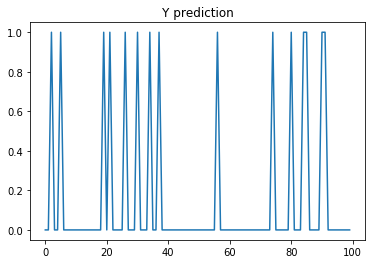

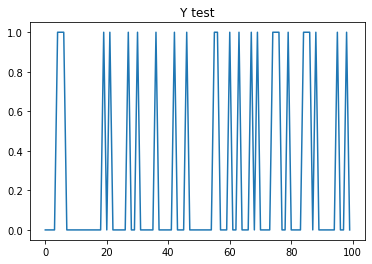

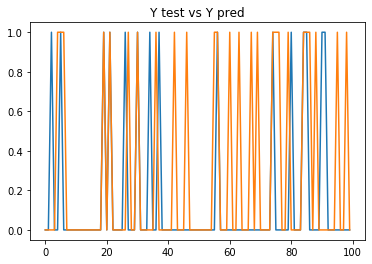

In [118]:
plt.title("Y prediction")
plt.plot(tpred_lr_test1[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(Ttest2[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(tpred_lr_test1[0:100])
plt.plot(np.array(Ttest2[0:100]))
plt.show()

### Accuracy and F1 for training data

In [119]:
print('Accuracy:', accuracy_score(Ttrain2, tpred_lr_train1))
print('F1 score:', f1_score(Ttrain2, tpred_lr_train1))

Accuracy: 0.7802588175589952
F1 score: 0.39270687237026647


### Confusion Matrix on Testing Dataset

In [120]:
cf3=confusion_matrix(Ttest2,tpred_lr_test1)
TP3=cf3[1][1]
TN3=cf3[0][0]
FN3=cf3[1][0]
FP3=cf3[0][1]
cf3

array([[697,  91],
       [124,  74]], dtype=int64)

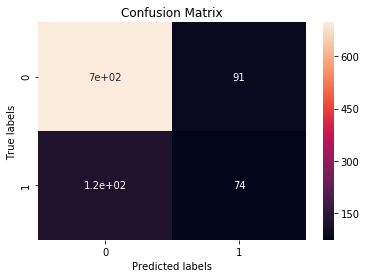

In [121]:
ax3 = plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax3); 

ax3.set_xlabel('Predicted labels');
ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix');

### Evaluation Metrics

#### Precision

In [122]:
precision3=(TP3/(TP3+FP3))
precision3

0.4484848484848485

#### Specificity

In [123]:
specificity3=TN3/(TN3+FP3)
specificity3

0.8845177664974619

#### Recall

In [124]:
recall3=TP3/(TP3+FN3)
recall3

0.37373737373737376

### Accuracy and F1 on testing dataset

In [125]:
print('Accuracy:', accuracy_score(Ttest2,tpred_lr_test1))
print('F1 score:', f1_score(Ttest2,tpred_lr_test1))

Accuracy: 0.781947261663286
F1 score: 0.40771349862258954


### ROC AUC Score

In [126]:
roc_auc_score(Ttest2,tpred_lr_test1)

0.6291275701174178

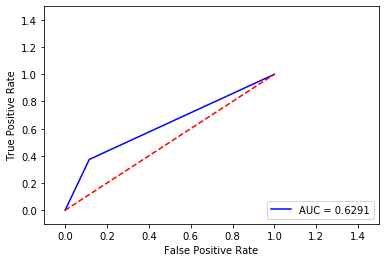

In [127]:
fp_rate3, tp_rate3, thr3 = roc_curve(Ttest2, tpred_lr_test1)
roc_auc3 = auc(fp_rate3, tp_rate3)
plt.plot(fp_rate3, tp_rate3, 'b',
label='AUC = %0.4f'% roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Discussion about evaluation metrics

Evaluation of a model is an important task and it is critical to choose correct evaluation metrics to gain proper and accurate results. Choice of a metric highly depends on the problem being solved. Sometimes your accuracy might be important or sometimes precision. While some errors mights be acceptable to some business problems others may create a critical issue. Following are some of the popular evaluation measures that have been used in the assignment.

**Confusion Matrix:** A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

**Precisiom:** Precision means the percentage of your results which are relevant. 
$$\displaystyle 
precision=\frac{TP}{TP+FP} $$

**Recall:** Recall refers to the percentage of total relevant results correctly classified by your algorithm.
$$\displaystyle 
recall=\frac{TP}{TP+FN}$$

**F1 Score:** F1 Score is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximize this number to make your model better.It is the harmonic mean of precision and recall.
$$\displaystyle 
F1 = 2 × \frac{precision×recall}{precision+recall} $$

**ROC Curve:** The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It is a graphical plot which illustrates the diagnostic ability of a binary classifier model as its discrimination threshold is varied. When the classification results are good, the curve gets close to retangular curve, close to 1 on the 0 FPR.


### Discussion about Train and Test accuracies

#### Pocket

For Train Data:<br>
Accuracy: 0.6305506216696269<br>
F1 score: 0.1991199119911991

For Test Data:<br>
Precision:0.21631205673758866<br>
Recall:  0.30808080808080807<br>
Specificity: 0.7195431472081218<br>
ROC AUC Score: 0.513811977644465

Accuracy: 0.6369168356997972<br>
F1 score: 0.25416666666666665

Pocket algorithm gave precision for training around 63% for training and testing. Seems like it has performed worst on the data among all the models. The F1 score is also very low. This maybe because the data might not be linearly seperable and maybe biased.

#### QDA

For Train Data:<br>
Accuracy: 0.7645267698553666<br>
F1 score: 0.46971428571428575

For Test Data:<br>
Precision:0.43661971830985913<br>
Recall: 0.6262626262626263<br>
Specificity: 0.7969543147208121<br>
ROC AUC Score: 0.7116084704917194

Accuracy: 0.7626774847870182<br>
F1 score: 0.5145228215767635

Recall/Sensitivity is the measure of the probability that your estimate is 1 given all the samples whose true class label is 1. It is a measure of how many of the positive samples have been identified as being positive. Hence, we can say that QDA was able to classify maximum of the positive class correctly with an accuracy of around 76% for train and test data respectively.

#### LDA

For Train Data:<br>
Accuracy: 0.7416899264146156<br>
F1 score: 0.4532760472610097<br>

For Test Data:<br>
Precision: 0.4214046822742475<br>
Recall: 0.6363636363636364<br>
Specificity: 0.7804568527918782<br>
ROC AUC Score:0.7084102445777573

Accuracy: 0.7515212981744422<br>
F1 score: 0.5070422535211266

Recall/Sensitivity is the measure of the probability that your estimate is 1 given all the samples whose true class label is 1. Looks like this model was also able to accurately predict the positive class. The accuracy is 74% and 75% for train and test data.

#### Logistic Regression

For Train Data:<br>
Accuracy: 0.7802588175589952<br>
F1 score: 0.39270687237026647

For Test Data:<br>
Precision: 0.4484848484848485<br>
Recall: 0.37373737373737376<br>
Specificity: 0.8845177664974619<br>
ROC AUC Score: 0.6291275701174178

Accuracy: 0.781947261663286<br>
F1 score: 0.40771349862258954

Logistic regression performed better than Pocket with more accuracy that Pocket. It has achieved similar accuracy and F1 score both on train and test data.

## Discussions about Classification model comparision

From above results we can clearly see that QDA algorithm is achieving better results compared to other models with LDA algorithm performing second best considering AUC score, F1 score. AUC score, F1 are used for evaluation. The third best would be Logistic Regression considering AUC score, F1 score. AUC score, F1 are used for evaluation. And the last would be Pocket. Looks like pocket was not able to accurately predict the positive class since it has very low Recall. Recall/Sensitivity is the measure of the probability that your estimate is 1 given all the samples whose true class label is 1. Hence, we can say that with maximum recall, QDA was able to classify a lot of the positive samples correctly to its true class label.

Pocket<br>
Precision:0.21631205673758866<br>
Recall:  0.30808080808080807<br>
Specificity: 0.7195431472081218

QDA<br>
Precision:0.43661971830985913<br>
Recall: 0.6262626262626263<br>
Specificity: 0.7969543147208121

LDA<br>
Precision: 0.4214046822742475<br>
Recall: 0.6363636363636364<br>
Specificity: 0.7804568527918782

Logistic Regession<br>
Precision: 0.4484848484848485<br>
Recall: 0.37373737373737376<br>
Specificity: 0.8845177664974619

# Conclusions

I think QDA model worked better than other models with my data based on Auc and F1 score. This assignment helped me evaluate a model based on their evaluation metrics which gives us better view of how a model is performing and decide which model might be good for a biased dataset.<br>
The dataset I have used is biased. Almost all the data points belong to class 0 and some data points belong to class 1. Due to this the accuracies of all the models are affected. It was hard to figure out earlier if there was a problem in the dataset or with my model. These were some of the challenges I faced while working on this assignment. As a result a lot of pre-processing also had to be done. 

# References

- Plotting Heatmaps : https://seaborn.pydata.org/
- Classification Dataset : https://www.kaggle.com/mhdzahier/travel-insurance
- Pandas : https://pandas.pydata.org/
- Professor's Notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Classification.Sol.ipynb,https://nbviewer.jupyter.org/format/slides/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/slides/Linear%20Classification.ipynb#/13
- https://stats.stackexchange.com/questions/51200/pocket-algorithm-for-training-perceptrons
- https://en.wikipedia.org/wiki/Quadratic_classifier
- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#targetText=A%20confusion%20matrix%20is%20a,the%20true%20values%20are%20known.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)